In [54]:
#Imports
import random
import math
import matplotlib.pyplot as plt

In [117]:
#definição do tipo abstrato Point
class Point:
	def __init__(self, x, y):
		self.x = x
		self.y = y

	def __str__(self):
		return f'({self.x}, {self.y}) ' #auxiliar para imprimir o ponto e conferir se as funções estão corretas

	def __repr__(self):
		return str(self)

	def __lt__(self, other):
		if self.x < other.x:
			return True
		elif self.x == other.x:
			if self.y < other.y:
				return True
		return False


#definição do tipo abstrato Segment contendo 2 pontos e os coeficientes a e b da reta
class Segment:
	def __init__(self, p1, p2):
		self.p1 = p1
		self.p2 = p2
		if p1.x == p2.x:
			p2.x += 0.0001
		self.a = (p1.y - p2.y)/(p1.x - p2.x)
		self.b = p1.y - self.a*p1.x

	def __str__(self):
		return f'({self.p1}, {self.p2})' #auxiliar para imprimir o segmento e conferir se as funções estão corretas

	def __repr__(self):
		return str(self)

	def __lt__(self, other):
		thisY = self.a * other.p1.x + self.b
		if thisY < other.p1.y:
			return True
		return False

	def __gt__(self, other):
		thisY = self.a * other.p1.x + self.b
		if thisY > other.p1.y:
			return True
		return False


#definição do tipo abstrato EndPoint contendo um ponto, ponteiro para o seguimento, e uma flag para saber se é o ponto inicial ou final do seguimento
class EndPoint:
	def __init__(self, point, segment, isLeft):
		self.point = point
		self.segment = segment
		self.isLeft = isLeft

	def __str__(self):
		return f'({self.point}, {self.segment}, {self.isLeft}) '

	def __repr__(self):
		return str(self)

	def __lt__(self, other):
		if self.point.x < other.point.x:
			return True
		elif self.point.x == other.point.x:
			if self.isLeft and not other.isLeft:
				return True
			elif not self.isLeft and other.isLeft:
				return False
			elif self.point.y < other.point.y:
				return True
		return False


In [56]:
#função para plotar um conjunto de pontos

def plotPoints(points):
    x = [p.x for p in points]
    y = [p.y for p in points]

    plt.scatter(x, y, marker='o', color='blue', label='points')

    # Adicionar rótulos aos points
    for p in points:
        plt.text(p.x, p.y, f'({p.x}, {p.y})', ha='right')

    plt.grid(True)
    plt.legend()
    plt.show()

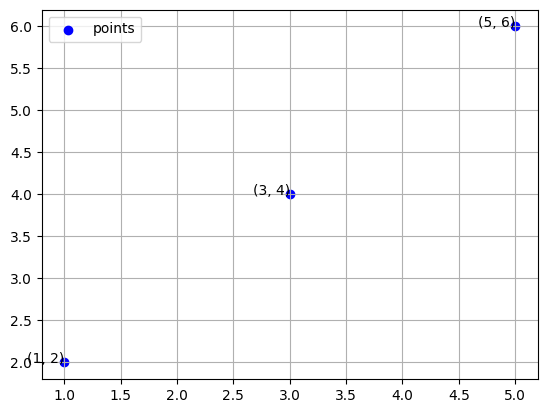

In [57]:
p = []
p.append(Point(1, 2))
p.append(Point(3, 4))
p.append(Point(5, 6))
plotPoints(p)

In [58]:
#função para plotar um conjunto de segmentos de reta como linhas numerados

def plotSegments(segments):
    x = [[s.p1.x, s.p2.x] for s in segments]
    y = [[s.p1.y, s.p2.y] for s in segments]

    for i in range(len(x)):
        plt.plot(x[i], y[i], marker='o', color='blue')

    plt.grid(True)
    plt.show()

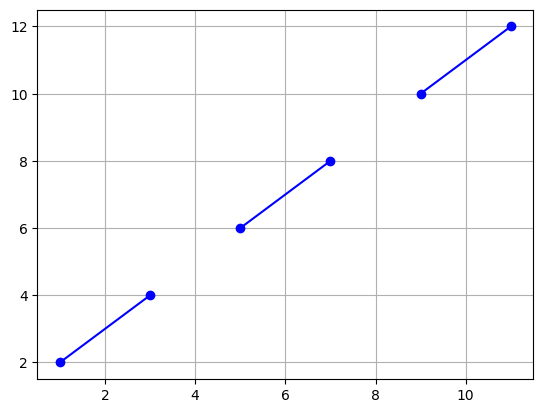

In [59]:
s = []
s.append(Segment(Point(1, 2), Point(3, 4)))
s.append(Segment(Point(5, 6), Point(7, 8)))
s.append(Segment(Point(9, 10), Point(11, 12)))
plotSegments(s)

In [60]:
def getDirection(sp1, sp2, p):
    return ((sp2.y - sp1.y) * (p.x - sp2.x) - (sp2.x - sp1.x) * (p.y - sp2.y))

def getOrientation(sp1, sp2, p):
    product = getDirection(sp1, sp2, p)

    if product > 0:
        return 1  # giro a direita
    elif product < 0:
        return -1  # giro a esquerda
    else:
        return 0  # colineares

In [61]:
def isOnSegment(sp1, sp2, p):
	if (p.x <= max(sp1.x, sp2.x) and p.x >= min(sp1.x, sp2.x) and p.y <= max(sp1.y, sp2.y) and p.y >= min(sp1.y, sp2.y)):
		return True
	return False

In [62]:
# Encontrar interseções entre duas retas
def segmentsIntersect(s1p1, s1p2, s2p1, s2p2):
	d1 = getOrientation(s2p1, s2p2, s1p1)
	d2 = getOrientation(s2p1, s2p2, s1p2)
	d3 = getOrientation(s1p1, s1p2, s2p1)
	d4 = getOrientation(s1p1, s1p2, s2p2)
	if((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
		return True
	elif d1 == 0 and isOnSegment(s2p1, s2p2, s1p1):
		return True
	elif d2 == 0 and isOnSegment(s2p1, s2p2, s1p2):
		return True
	elif d3 == 0 and isOnSegment(s1p1, s1p2, s2p1):
		return True
	elif d4 == 0 and isOnSegment(s1p1, s1p2, s2p2):
		return True    
	return False

In [63]:
class TreeNode(object):
	def __init__(self, value):
		self.value = value
		self.left = None
		self.right = None
		self.height = 1

	def __str__(self):
		return f'({self.value})'

	def __repr__(self):
		return str(self)

In [64]:
class AVLTree(object):
		 
	def insert(self, node, value):
 
		if not node:
			return TreeNode(value)
		elif value < node.value:
			node.left = self.insert(node.left, value)
		else:
			node.right = self.insert(node.right, value)
		node = self.balance(node) # balance the tree everytime a new node is inserted
		return node

	def balance(self, node):
		node = self.refreshHeight(node) # update the height of the node
		balanceFactor = self.getBalanceFactor(node) # check whether the node is unbalanced, and if so, if it has to be rotated to the left or to the right
		if balanceFactor < -1:
			if self.getBalanceFactor(node.left) > 0:
				node.left = self.rotateLeft(node.left)
			node = self.rotateRight(node)
		elif balanceFactor > 1:
			if self.getBalanceFactor(node.right) < 0:
				node.right = self.rotateRight(node.right)
			node = self.rotateLeft(node)
		return node

	def remove(self, node, value):
		if not node:
			return node
		elif value < node.value:
			node.left = self.remove(node.left, value)
		elif value > node.value:
			node.right = self.remove(node.right, value)
		else:
			if node.left is None:
				temp = node.right
				node = None
				return temp
			elif node.right is None:
				temp = node.left
				node = None
				return temp
			temp = self.getMinValue(node.right)
			node.value = temp.value
			node.right = self.remove(node.right, temp.value)
		if node is None:
			return node
 
		node = self.refreshHeight(node)
		node = self.balance(node)
		return node

	def getMinValue(self, node):
		if node is None or node.left is None:
			return node
		return self.getMinValue(node.left)

	def refreshHeight(self, node):
		node.height = max(self.getHeight(node.left), self.getHeight(node.right)) + 1 # height of a node is the maximum height of its children plus 1
		return node

	def getHeight(self, node):
		if not node:
			return 0 # height of an empty node is 0
		return node.height
 
	def getBalanceFactor(self, node):
		if not node:
			return 0 # balance factor of an empty node is 0
		return self.getHeight(node.right) - self.getHeight(node.left) # balance factor of a node is the height of its right child minus the height of its left child
 
	def preOrder(self, node):
		if not node:
			return
		print(node.value, node.height)
		self.preOrder(node.left)
		self.preOrder(node.right)

	def inOrder(self, node):
		if not node:
			return
		self.inOrder(node.left)
		print(node.value, node.height)
		self.inOrder(node.right)
		 
	def rotateLeft(self, node):
		aux = node.right
		node.right = aux.left
		aux.left = node
		aux = self.refreshHeight(aux)
		node = self.refreshHeight(node)
		return aux

	def rotateRight(self, node):
		aux = node.left
		node.left = aux.right
		aux.right = node
		aux = self.refreshHeight(aux)
		node = self.refreshHeight(node)
		return aux

	def above(self, node, value):
		above = None
		while node != None:
			if node.value > value:
				above = node
				node = node.left
			else:
				node = node.right
		return above

	def below(self, node, value):
		below = None
		while node != None:
			if node.value < value:
				below = node
				node = node.right
			else:
				node = node.left
		return below

	# Auxiliary function to get the arrays necessary to plot the tree
	def getArraysForVisualization(self, node, x, y, xStep):
		treeArray = []
		valArray = []
		closeFamily = []
		if not node:
			return [], [], []

		thisFamily = []
		thisFamily.append(node.value)
		if node.left:
			thisFamily.append(node.left.value)
		else:
			thisFamily.append(None)
		if node.right:
			thisFamily.append(node.right.value)
		else:
			thisFamily.append(None)

		closeFamily.append(thisFamily)

		treeArray.append((x, y))
		valArray.append(node.value)

		treeAux, valAux, famAux = self.getArraysForVisualization(node.left, x - xStep, y - 1, xStep / 1.4)
		treeArray += treeAux
		valArray += valAux
		closeFamily += famAux

		treeAux, valAux, famAux = self.getArraysForVisualization(node.right, x + xStep, y - 1, xStep / 1.4)
		treeArray += treeAux
		valArray += valAux
		closeFamily += famAux
		return treeArray, valArray, closeFamily

	# Plot the tree
	def visualizeTree(self, node):
		if node == None:
			return None
		treeArray, valArray, closeFamily = Tree.getArraysForVisualization(node, 0, 0, 8)

		x = [point[0] for point in treeArray]
		y = [point[1] for point in treeArray]
		plt.scatter(x, y, marker='o', color='blue', label='Pontos')
		plt.title('AVL Tree')
		for i in range(len(x)):
			plt.text(x[i], y[i], valArray[i], ha='center', va='bottom', position=(x[i], y[i] + 0.1))
			
		plt.axis('off')

		# set range for x and y axes
		plt.ylim(min(y) - 1, max(y) + 1)
		plt.xlim(min(x) - 1, max(x) + 1)

		for i in closeFamily:
			parentIndex = valArray.index(i[0])
			if i[1] != None:
				leftChildIndex = valArray.index(i[1])
				plt.plot([x[parentIndex], x[leftChildIndex]], [y[parentIndex], y[leftChildIndex]], marker='o', color='blue')
			if i[2] != None:
				rightChildIndex = valArray.index(i[2])
				plt.plot([x[parentIndex], x[rightChildIndex]], [y[parentIndex], y[rightChildIndex]], marker='o', color='blue')
		return plt




PREORDER
50 4
20 3
10 2
15 1
40 1
70 3
60 1
80 2
90 1
INORDER
10 2
15 1
20 3
40 1
50 4
60 1
70 3
80 2
90 1


<module 'matplotlib.pyplot' from '/home/flipe/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

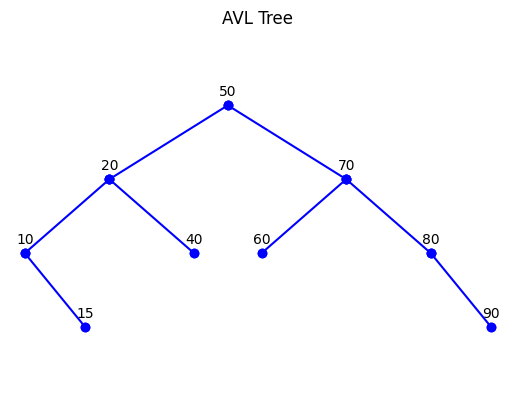

In [65]:
Tree = AVLTree()       
node = None
node = Tree.insert(node,40)
node = Tree.insert(node,60)
node = Tree.insert(node,50)
node = Tree.insert(node,70)
node = Tree.insert(node,80)
node = Tree.insert(node,90)
node = Tree.insert(node,10)
node = Tree.insert(node,20)
node = Tree.insert(node,15)
 
print("PREORDER")
Tree.preOrder(node)
print("INORDER")
Tree.inOrder(node)

Tree.visualizeTree(node)

# Line Sweeping

In [66]:
def generateRandomSegments(n):
	s = []
	for i in range(n):
		x1 = random.randint(0, 100)
		y1 = random.randint(0, 100)
		x2 = random.randint(0, 100)
		y2 = random.randint(0, 100)
		p1 = Point(x1, y1)
		p2 = Point(x2, y2)
		if p1 < p2:
			s.append(Segment(p1, p2))
		else:
			s.append(Segment(p2, p1))
	return s


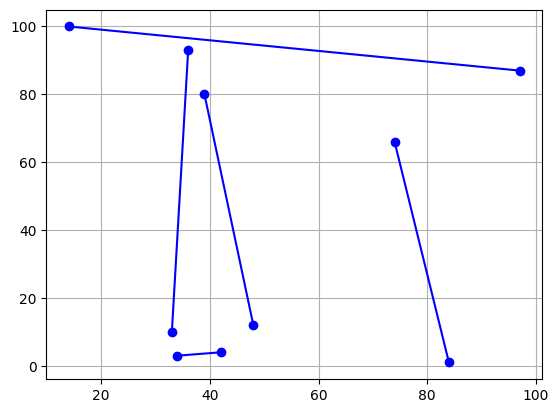

In [67]:
s = generateRandomSegments(5)
plotSegments(s)

In [68]:
def getEndpointArray(s):
	p = []
	lp = []
	rp = []
	for i in s:
		lep = None
		rep = None
		if i.p1 < i.p2:
			lep = EndPoint(i.p1, i, True)
			rep = EndPoint(i.p2, i, False)
		else:
			lep = EndPoint(i.p2, i, True)
			rep = EndPoint(i.p1, i, False)
		lp.append(lep)
		rp.append(rep)
	lp.sort()
	rp.sort()
	li = 0
	ri = 0
	while len(p) < len(lp) + len(rp):
		if li == len(lp):
			p.append(rp[ri])
			ri += 1
		elif ri == len(rp):
			p.append(lp[li])
			li += 1
		elif lp[li] < rp[ri]:
			p.append(lp[li])
			li += 1
		else:
			p.append(rp[ri])
			ri += 1
	return p

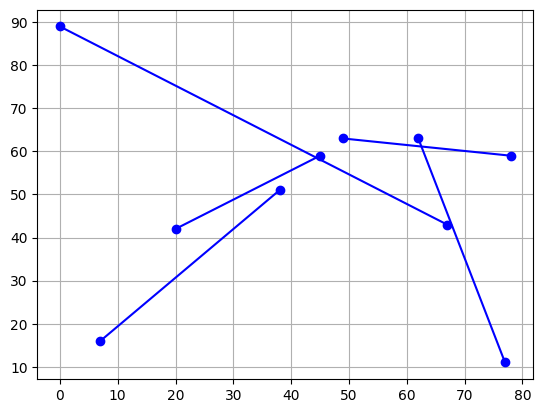

[((0, 89) , ((0, 89) , (67, 43) ), True) ,
 ((7, 16) , ((7, 16) , (38, 51) ), True) ,
 ((20, 42) , ((20, 42) , (45, 59) ), True) ,
 ((38, 51) , ((7, 16) , (38, 51) ), False) ,
 ((45, 59) , ((20, 42) , (45, 59) ), False) ,
 ((49, 63) , ((49, 63) , (78, 59) ), True) ,
 ((62, 63) , ((62, 63) , (77, 11) ), True) ,
 ((67, 43) , ((0, 89) , (67, 43) ), False) ,
 ((77, 11) , ((62, 63) , (77, 11) ), False) ,
 ((78, 59) , ((49, 63) , (78, 59) ), False) ]

In [69]:
s = generateRandomSegments(5)
plotSegments(s)
p = getEndpointArray(s)
p

In [70]:
def lineSweep(s):
	p = getEndpointArray(s)
	t = AVLTree()
	root = None
	for i in p:
		if i.isLeft:
			root = t.insert(root, i.segment)
			above = t.above(root, i.segment)
			if above != None:
				if segmentsIntersect(i.segment.p1, i.segment.p2, above.value.p1, above.value.p2):
					return True
			below = t.below(root, i.segment)
			if below != None:
				if segmentsIntersect(i.segment.p1, i.segment.p2, below.value.p1, below.value.p2):
					return True
		else:
			above = t.above(root, i.segment)
			below = t.below(root, i.segment)
			if above != None and below != None:
				if segmentsIntersect(above.value.p1, above.value.p2, below.value.p1, below.value.p2):
					return True
			root = t.remove(root, i.segment)
	return False

In [93]:
def lineSweep(s):
	p = getEndpointArray(s)
	t = AVLTree()
	root = None
	for i in p:
		if i.isLeft:
			root = t.insert(root, i.segment)

			plt = t.visualizeTree(root)
			if plt != None:
				plt.show()

			above = t.above(root, i.segment)
			print("i", i.segment, "above", above)
			if above != None:
				if segmentsIntersect(i.segment.p1, i.segment.p2, above.value.p1, above.value.p2):
					print("i", i.segment, "intersects above", above)
					# return True
			below = t.below(root, i.segment)
			print("i", i.segment, "below", below)
			if below != None:
				if segmentsIntersect(i.segment.p1, i.segment.p2, below.value.p1, below.value.p2):
					print("i", i.segment, "intersects below", below)
					# return True
		else:
			above = t.above(root, i.segment)
			below = t.below(root, i.segment)
			if above != None and below != None:
				if segmentsIntersect(above.value.p1, above.value.p2, below.value.p1, below.value.p2):
					print("above", above, "intersects below", below)
					return True
			root = t.remove(root, i.segment)

			plt = t.visualizeTree(root)
			if plt != None:
				plt.show()
			print("i", i.segment, "above", above)
			print("i", i.segment, "below", below)

	return False

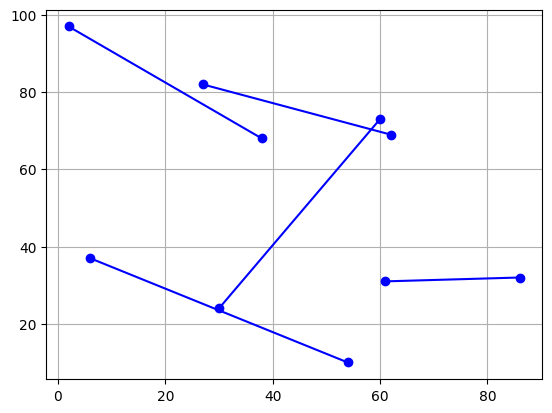

False

In [92]:
s = generateRandomSegments(5)
plotSegments(s)
lineSweep(s)

In [120]:
s1 = Segment(Point(2, 97), Point(38, 68))
s2 = Segment(Point(6, 37), Point(54, 10))
s3 = Segment(Point(27, 82), Point(62, 69))
s4 = Segment(Point(30, 24), Point(60, 73))
s5 = Segment(Point(61, 31), Point(86, 32))

In [123]:
s1 < s3
# s5 > s2

True

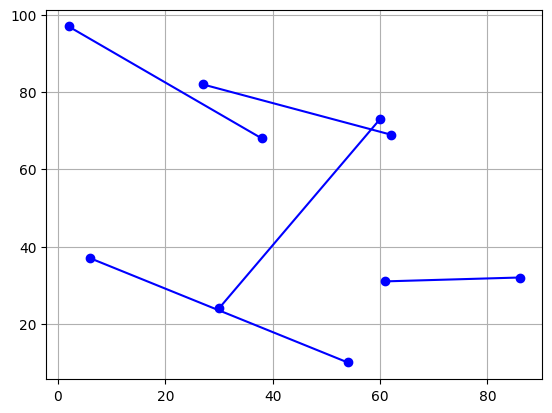

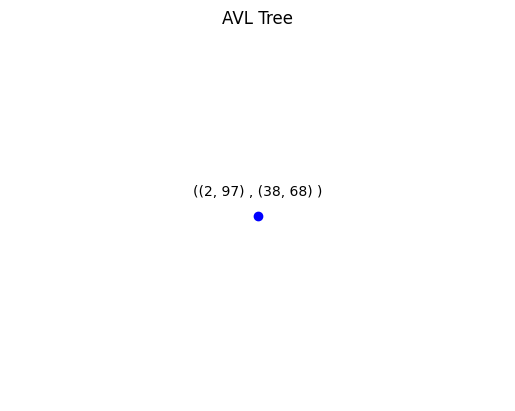

i ((2, 97) , (38, 68) ) above None
i ((2, 97) , (38, 68) ) below None


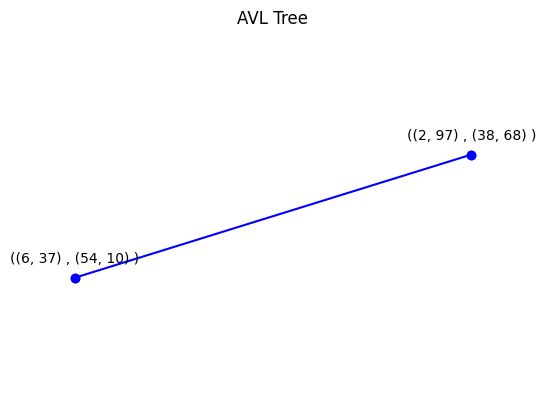

i ((6, 37) , (54, 10) ) above (((2, 97) , (38, 68) ))
i ((6, 37) , (54, 10) ) below None


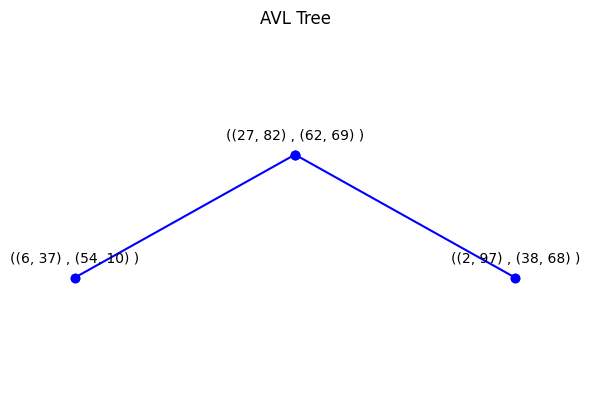

i ((27, 82) , (62, 69) ) above None
i ((27, 82) , (62, 69) ) below (((6, 37) , (54, 10) ))


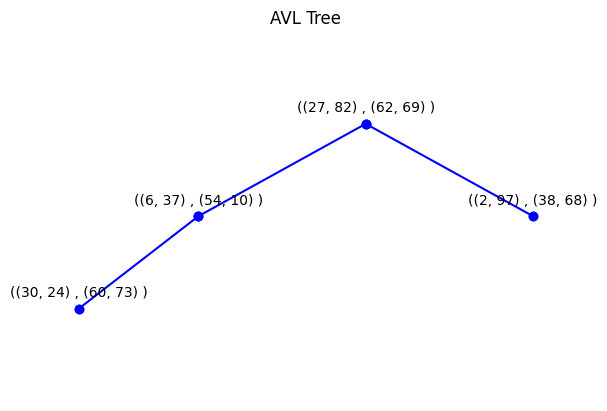

i ((30, 24) , (60, 73) ) above (((27, 82) , (62, 69) ))
i ((30, 24) , (60, 73) ) intersects above (((27, 82) , (62, 69) ))
i ((30, 24) , (60, 73) ) below (((6, 37) , (54, 10) ))


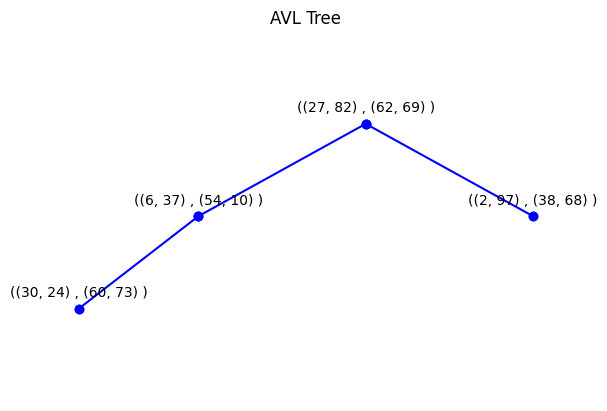

i ((2, 97) , (38, 68) ) above None
i ((2, 97) , (38, 68) ) below (((27, 82) , (62, 69) ))
above (((27, 82) , (62, 69) )) intersects below (((30, 24) , (60, 73) ))


True

In [121]:

plotSegments([s1, s2, s3, s4, s5])
lineSweep([s1, s2, s3, s4, s5])